## Gaussian Mixture Models

1. KMeans Zayıf Yönleri

In [2]:
from sklearn.datasets._samples_generator import make_blobs
X,y_true = make_blobs(n_samples=400,centers=4,cluster_std=0.6,random_state=0)

In [3]:
X = X[:,::-1] # eksenleri yer değiştirme

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(4,random_state=0)
labels = kmeans.fit(X).predict(X)

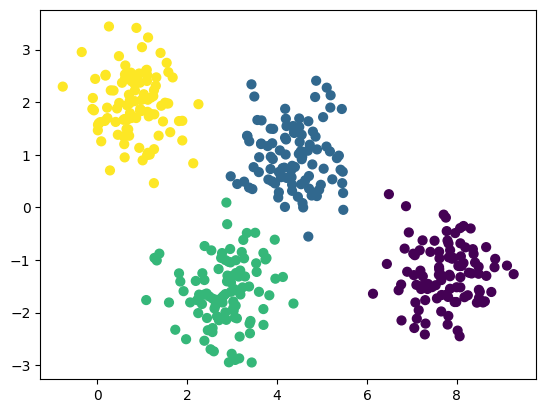

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

* Kümeleri daira içine alsak 2. ve 3. kümeler çakışacak. çakışan kümelerin hangi sınıfa ait olduğunu bilemiyecez. Kümeleri ayırmak için elastik bir yapı gerekir ve kmeans buna sahip değildir.
* Artı, olasılıksal bir değere sahip değildir.

2. Gaussian Mixture Models

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)

In [7]:
labels = gmm.predict(X)

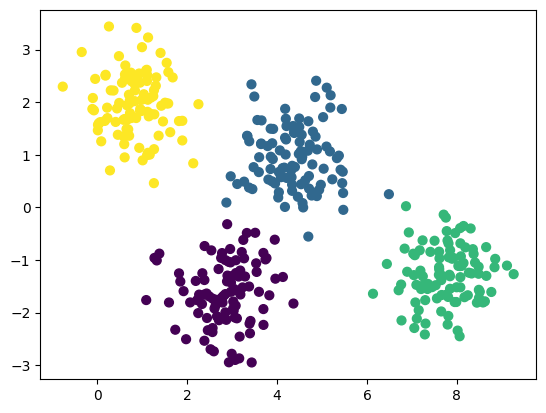

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

In [9]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3)) 

[[0.    0.537 0.463 0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]]


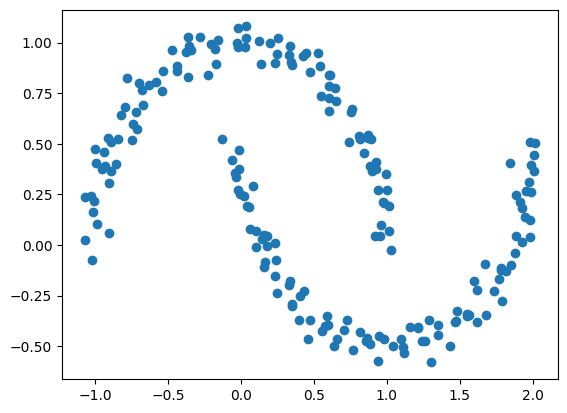

In [10]:
from sklearn.datasets import make_moons
x_moons,y_moons = make_moons(200,noise=0.05,random_state=0)
plt.scatter(x_moons[:,0],x_moons[:,1])

In [11]:
gmm2 = GaussianMixture(n_components=2,covariance_type='full',random_state=0)

## Optimal number of Components

In [13]:
import numpy as np
n_components = np.arange(1,21)

In [14]:
models = [GaussianMixture(n,covariance_type='full',random_state=0).fit(x_moons) for n in n_components]

Text(0.5, 0, 'n_components')

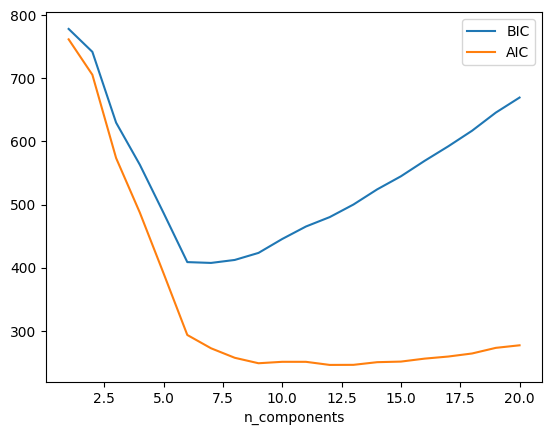

In [15]:
plt.plot(n_components,[m.bic(x_moons) for m in models],label='BIC')
plt.plot(n_components,[m.aic(x_moons) for m in models],label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

* Yukarıda görüldüğü gibi. optimal kümeleme sayısı BIC ve AIC değerlerini minimum yapan değerlerdir.
* BIC (Bayesian Information Criterion) ve AIC (Akaike Information Criterion), bir modelin karmaşıklığı ile uyumunu dengeleyen istatistiksel kriterlerdir. Model seçiminde kullanılırlar. Genellikle, daha düşük BIC veya AIC değeri olan model tercih edilir.

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
digits.data.shape

(1797, 64)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(.99,whiten=True)

In [21]:
data = pca.fit_transform(digits.data)

In [22]:
data.shape

(1797, 41)

In [27]:
n_components = np.arange(50,210,10)

In [29]:
models = [GaussianMixture(n,covariance_type='full',random_state=0)
          for n in n_components]

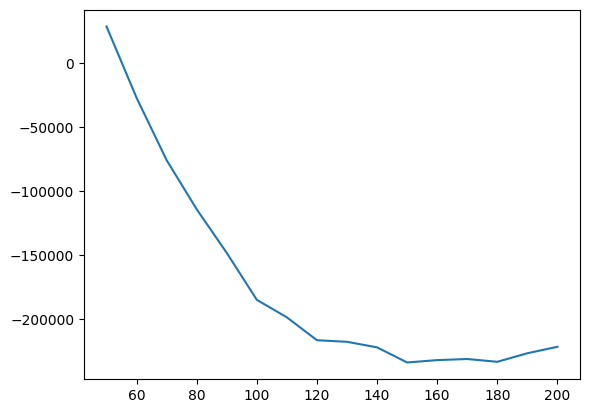

In [30]:
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components,aics)